In [1]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

In [3]:
from stable_baselines3 import PPO

In [3]:
BASE_PATH = '../../models/mlppolicy/'

In [4]:
# model = PPO.load(f'{BASE_PATH}/ppo/MlpPolicy/best_model.zip')
# model = PPO.load('../output_models/ppo/MlpPolicy/2022-06-16_22_41_02_12.zip')
# model = PPO.load('../../output_models/ppo/MlpPolicy/2022-08-22_13_37_20_30')
model = PPO.load(os.path.join(BASE_PATH, f'PPO_MlpPolicy_model'))

# X = np.load(f'{BASE_PATH}/ppo/MlpPolicy/observations.npy')
X = np.load(os.path.join(BASE_PATH, f'PPO_MlpPolicy_observations.npy'))
X = torch.Tensor(X)
X.shape

torch.Size([290, 1, 7])

In [5]:
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

In [ ]:
#predictions = np.squeeze(np.load(f'{BASE_PATH2}/actions/actions_ppo_MlpPolicy.npy'), axis=1)

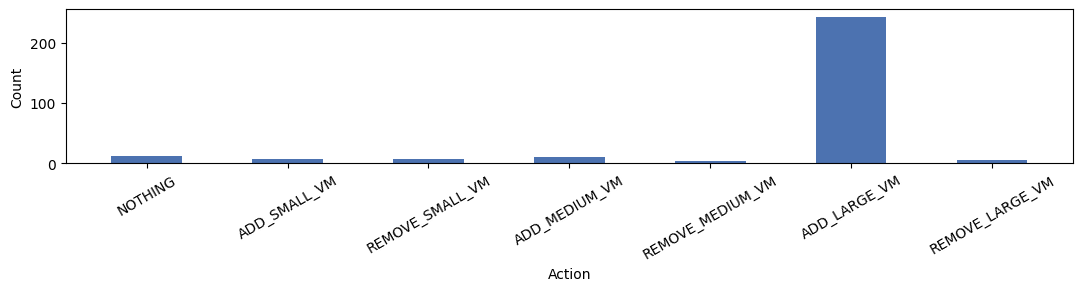

In [6]:
plot_action_histogram(predictions)

# Attributions

In [7]:
from ppo_policy import PPOPolicy
ppo_net = PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)

In [8]:
x = torch.tensor(X[0])
ppo_net.forward(x)

c:\Users\ultramarine\.conda\envs\trainloop_py37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[-0.4847]], grad_fn=<AddmmBackward0>)

In [9]:
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]

# X_sample = X[N+40:2*(N+40)]
# predictions_sample = predictions[N+40:2*(N+40)]

ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_sample,
                            predictions=predictions_sample)

# Mean Attributions

In [10]:

mean_attributions_per_action = ig_attributor.get_mean_attributions()

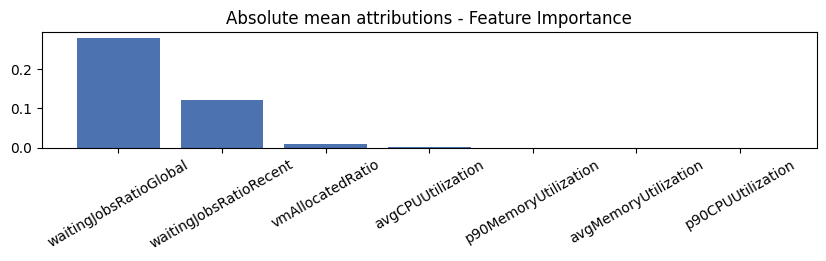

In [11]:
plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], abs=True)

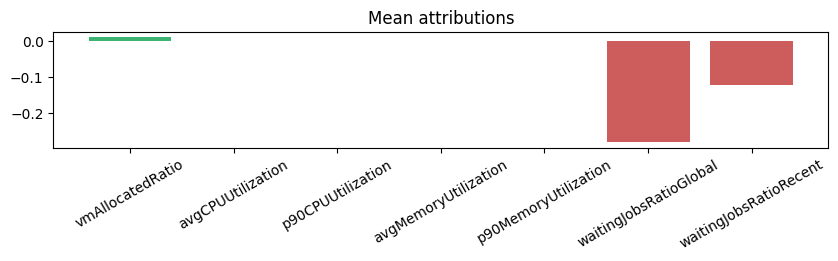

In [12]:
plot_mean_attributions(mean_attributions=mean_attributions_per_action[0])

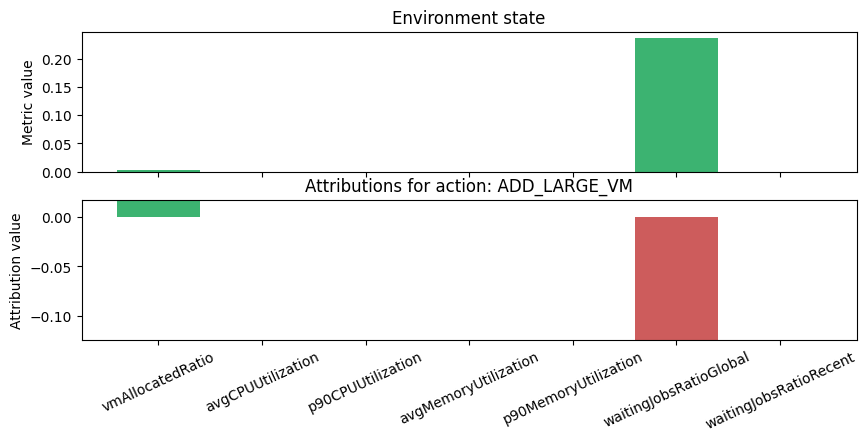

In [13]:
ig_attributor.explain_example(idx=150)

# Attributions for examples

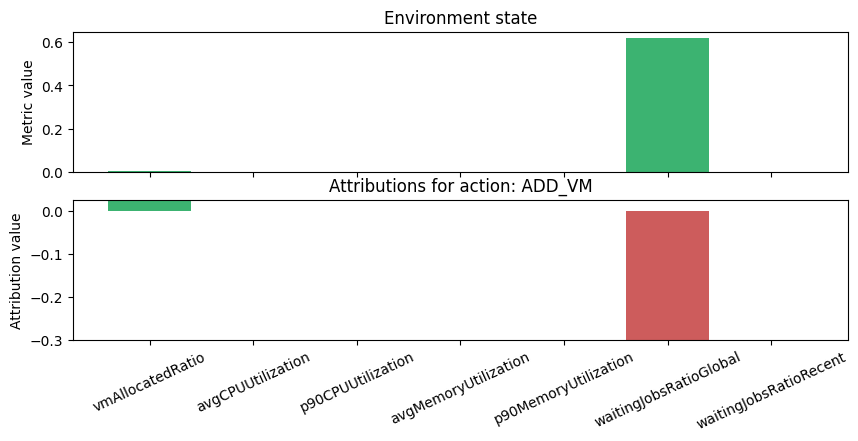

In [28]:
ig_attributor.explain_example(idx=48)

In [29]:
action_observation_map = get_action_observation_map(predictions)

Observation count for each action:
{'ADD_VM': 480, 'NOTHING': 22, 'REMOVE_VM': 10}


In [59]:
idx = action_observation_map['ADD_LARGE_VM'].squeeze(1)[:500]

In [60]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X[idx],
                            predictions=predictions[idx])

Action made: ADD_LARGE_VM


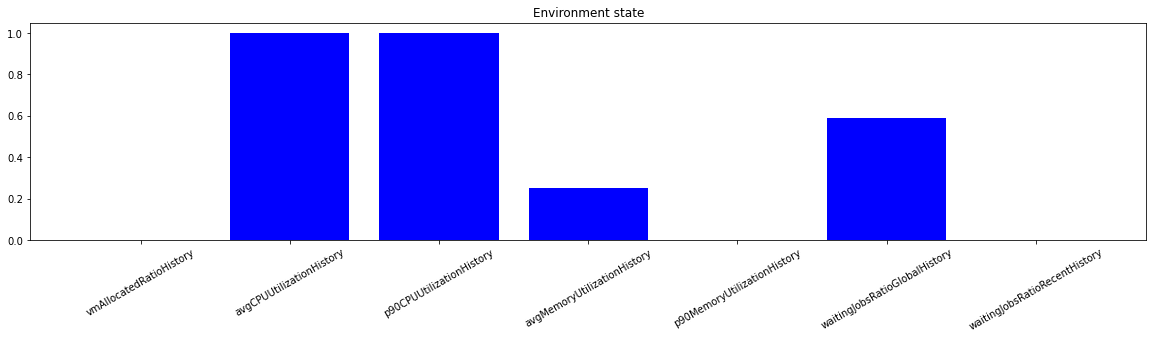

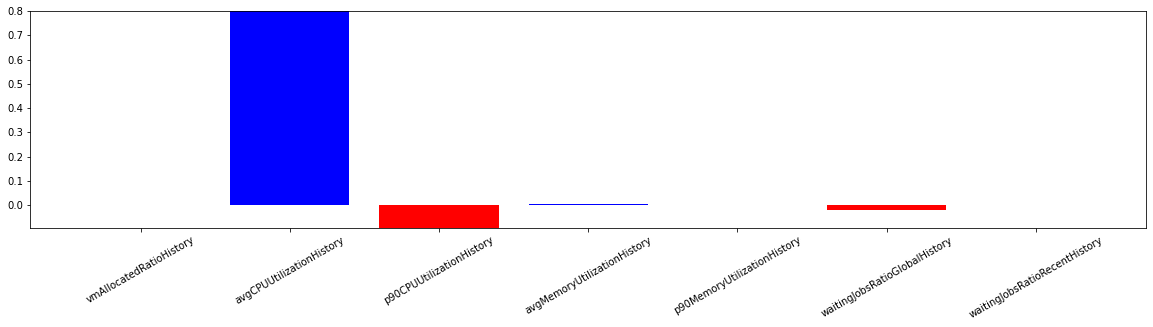

In [61]:
ig_attributor.explain_example(idx=1)

Action made: ADD_LARGE_VM


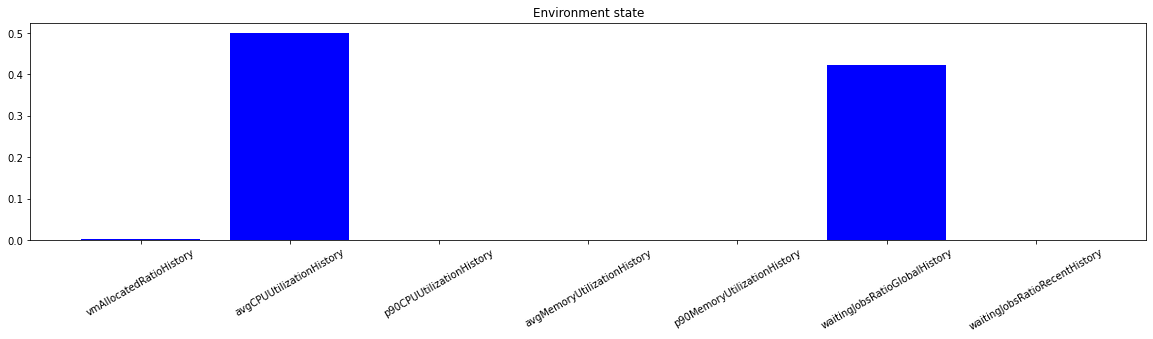

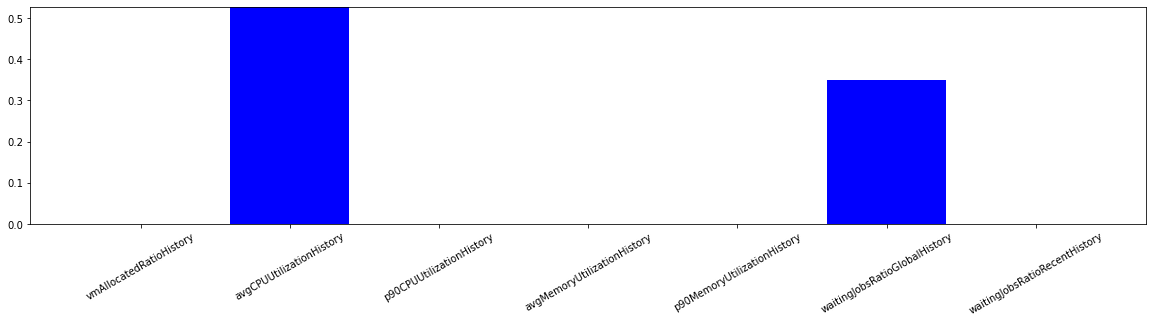

In [62]:
ig_attributor.explain_example(idx=10)

In [63]:
X_manual = torch.Tensor([
    [[0, 1, 1, 1, 1, 1, 1]],
    [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    [[0, 1, 1, 0, 0, 1, 1]],
    [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ])
    
predictions_manual = []
for _ in X_manual:
    predictions_manual.append(model.predict(X_manual[0])[0][0])
predictions_manual = np.array(predictions_manual)

In [64]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_manual,
                            predictions=predictions_manual)

Action made: ADD_SMALL_VM


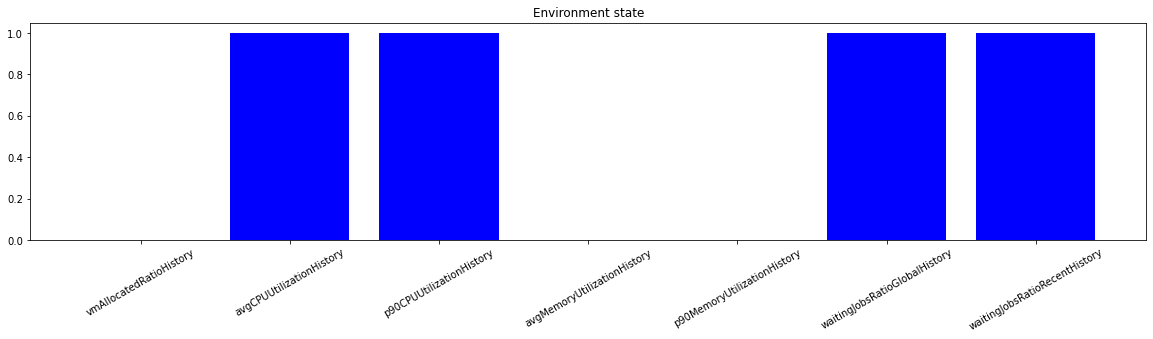

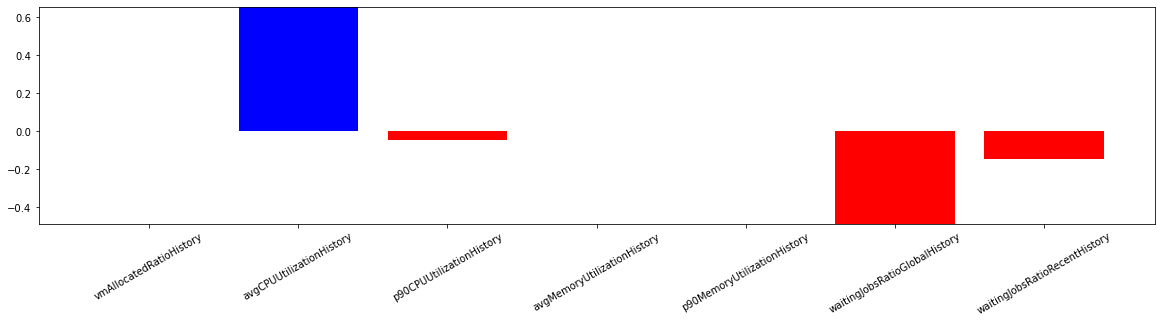

In [65]:
ig_attributor.explain_example(idx=2)

Action made: ADD_SMALL_VM


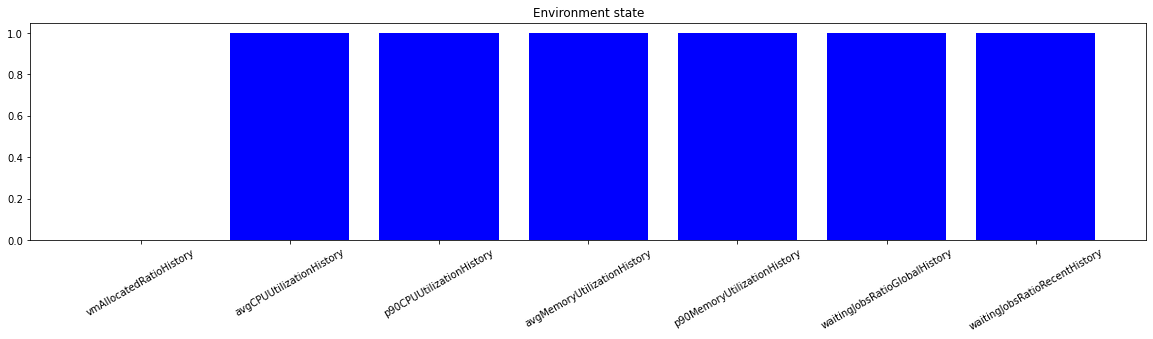

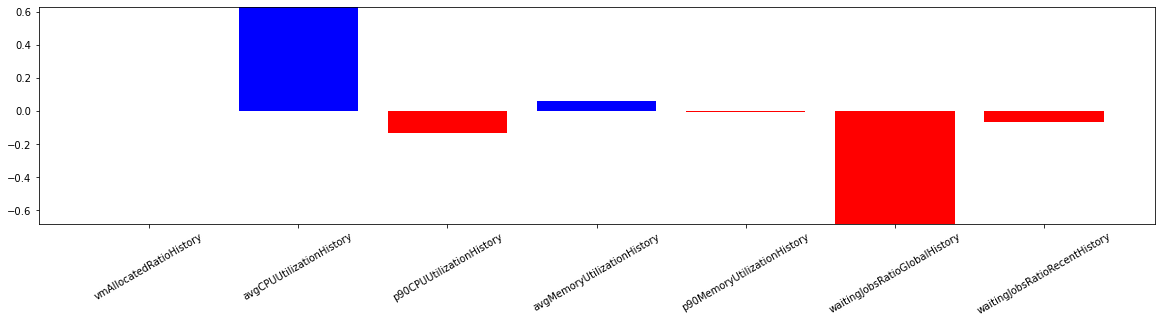

In [66]:
ig_attributor.explain_example(idx=0)

In [4]:
BASE_PATH = '../../models/18_06/afs_mlppolicy'
model = PPO.load(os.path.join(BASE_PATH, f'attention_MlpPolicy_model'))

# X = np.load(f'{BASE_PATH}/ppo/MlpPolicy/observations.npy')
X = np.load(os.path.join(BASE_PATH, f'attention_MlpPolicy_observations.npy'))
X = torch.Tensor(X)
X.shape

torch.Size([575, 1, 7])

In [5]:
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

In [6]:
from ppo_policy import PPOPolicy
ppo_net = PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)

In [7]:
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]

# X_sample = X[N+40:2*(N+40)]
# predictions_sample = predictions[N+40:2*(N+40)]

ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_sample,
                            predictions=predictions_sample)

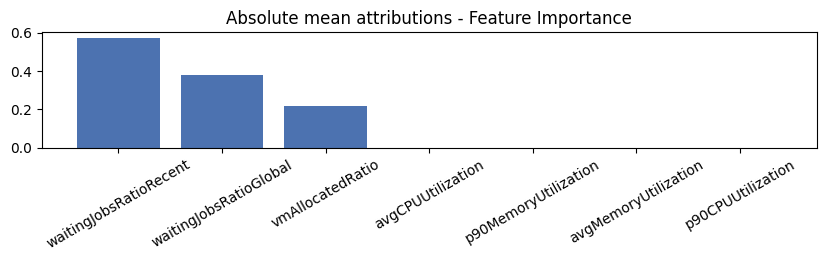

In [8]:
mean_attributions_per_action = ig_attributor.get_mean_attributions()
plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], abs=True)


Chosen features correspond with features selected with Attention: 0, 5, 6
Chosen features correspond with features selected with PCA: 0, 1, 5, 6

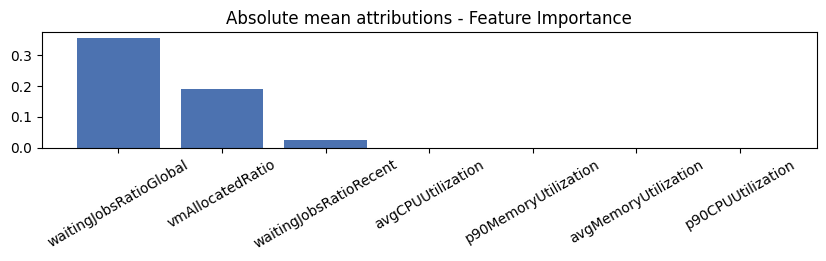

In [9]:
BASE_PATH = '../../models/18_06/pca_feature_selection'
model = PPO.load(os.path.join(BASE_PATH, f'attention_MlpPolicy_model'))

# X = np.load(f'{BASE_PATH}/ppo/MlpPolicy/observations.npy')
X = np.load(os.path.join(BASE_PATH, f'attention_MlpPolicy_observations.npy'))
X = torch.Tensor(X)
X.shape
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)
from ppo_policy import PPOPolicy
ppo_net = PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]

# X_sample = X[N+40:2*(N+40)]
# predictions_sample = predictions[N+40:2*(N+40)]

ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_sample,
                            predictions=predictions_sample)
mean_attributions_per_action = ig_attributor.get_mean_attributions()
plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], abs=True)


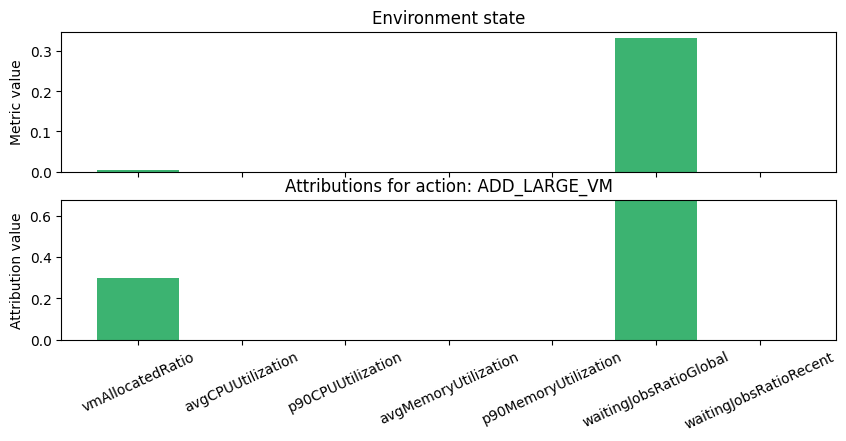

In [10]:
ig_attributor.explain_example(idx=1)

In [6]:
BASE_PATH = '../../models/18_06/attention_automatic'
from stable_baselines3 import PPO
import os
from attention_feature_extraction_2 import AdaptiveAttentionFeatureExtractor
model = PPO.load(os.path.join(BASE_PATH, f'attention_MlpPolicy_model'), custom_objects={
            "features_extractor_class": AdaptiveAttentionFeatureExtractor,
            "features_extractor_kwargs": {
                "max_reduced_dim": 8,
                "min_reduced_dim": 2,
                "key_dim": 16,
                "value_dim": 16,
                "temp_init": 1.0,
                "temp_decay": 0.995
            }
        })

# X = np.load(f'{BASE_PATH}/ppo/MlpPolicy/observations.npy')
X = np.load(os.path.join(BASE_PATH, f'attention_MlpPolicy_observations.npy'))
X = torch.Tensor(X)
X.shape
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)
from ppo_policy import PPOPolicy
ppo_net = PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)
N = 10
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]

# X_sample = X[N+40:2*(N+40)]
# predictions_sample = predictions[N+40:2*(N+40)]



In [7]:
predictions_sample

array([0, 5, 3, 5, 0, 5, 5, 5, 5, 5], dtype=int64)

In [8]:
X_sample.shape

torch.Size([10, 1, 7])

In [9]:

ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='attention',
                            data=X_sample,
                            predictions=predictions_sample)
mean_attributions_per_action = ig_attributor.get_mean_attributions()
plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], abs=True)

RuntimeError: Expected size for first two dimensions of batch2 tensor to be: [500, 8000] but got: [500, 16].